In [1]:
# Importação da bibliotecas do Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**1 Exploração do conjunto de dados**

In [19]:
# Carregar o conjunto de dados

url = "https://raw.githubusercontent.com/alvesdealmeida/dataset/refs/heads/main/TelecomCustomerChurn.csv"

df = pd.read_csv(url)

#df = pd.read_csv("/content/drive/MyDrive/Dataset/TelecomCustomerChurn.csv")
#display(df)

In [3]:
# 1 Exploração do conjunto de dados
print("1 - Exploração dos Dados")

# Visualização das primeiras e últimas linhas do conjunto de dados
print(df.head())
print(df.tail())

1 - Exploração dos Dados
   customerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  Contract Paperless

In [4]:
# Descrever as variáveis
print("Descrição das variáveis:")
print(df.info())
#print(df.describe(include='all'))

Descrição das variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

**2 Limpeza de Dados**

In [5]:
# 2 Limpeza de Dados
# apagar a coluna Unnamed: 0 e IDCliente são colunas desnecessárias
#df = df.drop(['customerID'], axis=1)

# Passo 2.1: Tratamento de valores ausentes
print("\nTratamento de valores ausentes")
missing_data = df.isnull().sum()

print("Valores ausentes por coluna:")
print(missing_data[missing_data > 0])


Tratamento de valores ausentes
Valores ausentes por coluna:
Series([], dtype: int64)


In [6]:
# Imputação de valores numéricos pela média
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # converte para números
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
#df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [7]:
# Inputação de valores categóricos pela moda
#df['Dependentes'].fillna(df['Dependentes'].mode()[0], inplace=True)
#df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Churn'] = df['Churn'].fillna(df['Churn'].mode()[0])

In [8]:
# Remover coluna vazia
#df.drop(columns=['Codigo'], inplace=True)

In [9]:
# Passo 2.2: Correção de Erros e Inconsistências
df['Gender'] = df['Gender'].str.lower()  # Exemplo para uma coluna categórica

In [10]:
# Passo 2.3: Remoção de Duplicatas
df.drop_duplicates(inplace=True)

**3 Detecção e Tratamento de outliers parte 1**

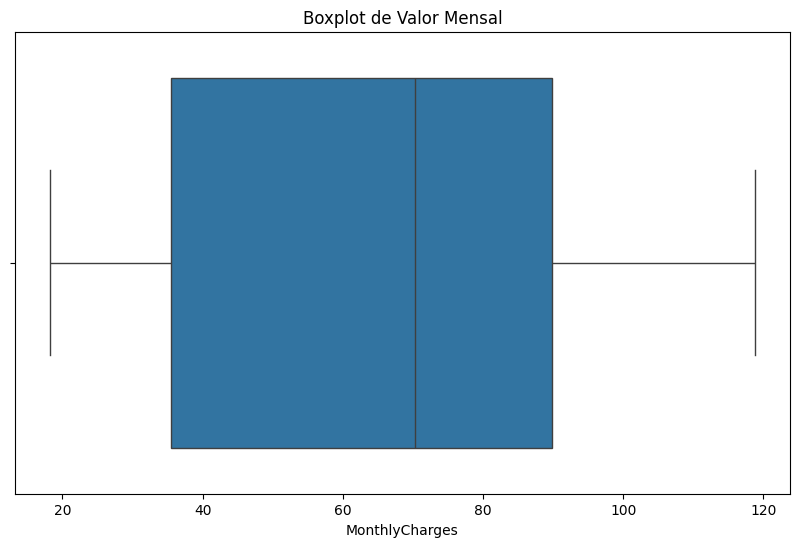

In [11]:
# 3 Detecção e Tratamento de outliers
# Passo 3.1: Visualização dos outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot de Valor Mensal')
plt.show()

**Detecção e Tratamento de Outliers - parte 2**

Estatísticas Descritivas de MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Intervalo Interquartil (IQR): 54.349999999999994
Limite Inferior para Outliers: -46.02499999999999
Limite Superior para Outliers: 171.375

Outliers encontrados:
Empty DataFrame
Columns: [customerID, Gender, SeniorCitizen, Partner, Dependents, Tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


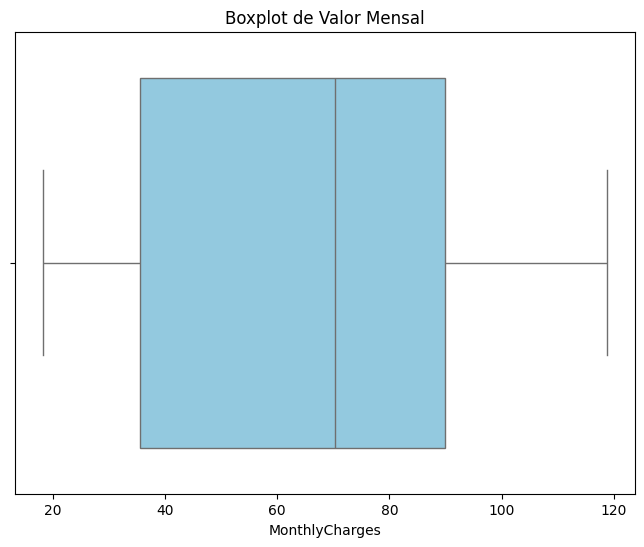

In [14]:
# Estatísticas descritivas para o valor mensal
desc_stats = df['MonthlyCharges'].describe()
q1 = desc_stats['25%']  # Primeiro quartil
median = desc_stats['50%']  # Mediana
q3 = desc_stats['75%']  # Terceiro quartil
iqr = q3 - q1  # Intervalo interquartil

# Definindo limites para outliers (valores fora de 1,5 vezes o intervalo interquartil)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrando valores que estão fora desses limites (outliers)
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]

# Exibindo estatísticas
print("Estatísticas Descritivas de MonthlyCharges:")
print(desc_stats)
print(f"\nIntervalo Interquartil (IQR): {iqr}")
print(f"Limite Inferior para Outliers: {lower_bound}")
print(f"Limite Superior para Outliers: {upper_bound}")
print(f"\nOutliers encontrados:\n{outliers}")

# Plotando o boxplot para visualizar
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='MonthlyCharges', color='skyblue')
plt.title("Boxplot de Valor Mensal")
plt.xlabel("MonthlyCharges")
plt.show()

**Comentários sobre o Boxplot MonthlyCharges sugere:**

**1 Distribuição Geral:**

Faixa de valores mensais entre aproximadamente 20 e 120.

O boxplot é bastante simétrico, indicando que os valores não possuem uma tendência acentuada de assimétria.  

**Quartis:**

A linha central representa a mediana, que parece estar próxima de 70, indicando que metade dos clientes paga abaixo desse valor e metade paga acima.

A parte inferior e superior do retângulo representam o primeiro e o terceiro quartil, respectivamente, mostrando que 50% dos valores estão concentrados aproximadamente entre 40 e 90.

**3 Amplitude e Disperção:**

A distância entre os quartis indica que há uma grande variação nos valores cobrados mensalmente.

Nâo há outliers visíveis (não se encontra ponto fora do intervalo dos limites do bosplot), o que é um indicador de que a maioria dos clientes paga da faixa esperada sem valores muito distantes.

**Síntese:**

 A ampla faixa de valores pode refletir a presença de diferentes planos ou pacotes oferecidos, com alguns mais acessíveis e outros premium. E como a mediana está próxima do terceiro quartil, isso pode ser um indicador de que uma proporção significativa de clientes paga um valor mais alto, enquanto há uma menor quantidade pagando valores abaixo de 70.          

In [12]:
# Passo 3.2: Tratamento de outliers
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['MonthlyCharges'] >= Q1 - 1.5 * IQR) & (df['MonthlyCharges'] <= Q3 + 1.5 * IQR)]
print(df)

      customerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
0     7590-VHVEG  female              0     Yes         No       1   
1     5575-GNVDE    male              0      No         No      34   
2     3668-QPYBK    male              0      No         No       2   
3     7795-CFOCW    male              0      No         No      45   
4     9237-HQITU  female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    male              0     Yes        Yes      24   
7039  2234-XADUH  female              0     Yes        Yes      72   
7040  4801-JZAZL  female              0     Yes        Yes      11   
7041  8361-LTMKD    male              1     Yes         No       4   
7042  3186-AJIEK    male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes

**4 Codificação e Padronização**

In [ ]:
# 4 Codificação e Padronização
# Passo 4.1: Codificação de variáveis categóricas
df = pd.get_dummies(df, columns=['Gender', 'Partner', 'Churn'], drop_first=True)

In [ ]:
# Passo 4.2: Padronização ou Normalização
scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

**5 Feature Engineering e Visualização**

In [ ]:
# 5 Feature Engineering e Visualização
# Passo 5.1: Criação de Novas variáveis
df['TotalExpensePerMonth'] = df['TotalCharges'] / (df['Tenure'] + 1)

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np

# Verifique se 'Gender' existe e é categórica
#if 'Gender' in df.columns and df['Gender'].dtype == 'object':
#    # Confirme que há colunas numéricas no DataFrame
#    numeric_cols = df.select_dtypes(include=[np.number]).columns
#    if len(numeric_cols) > 0:
#        sns.pairplot(df, hue='Gender')
#        plt.suptitle('Distribuições e Correlações', y=1.02)
#        plt.show()
#    else:
#        print("O DataFrame não contém colunas numéricas para o pairplot.")
#else:
#    print("A coluna 'Gender' não está presente ou não é categórica.")


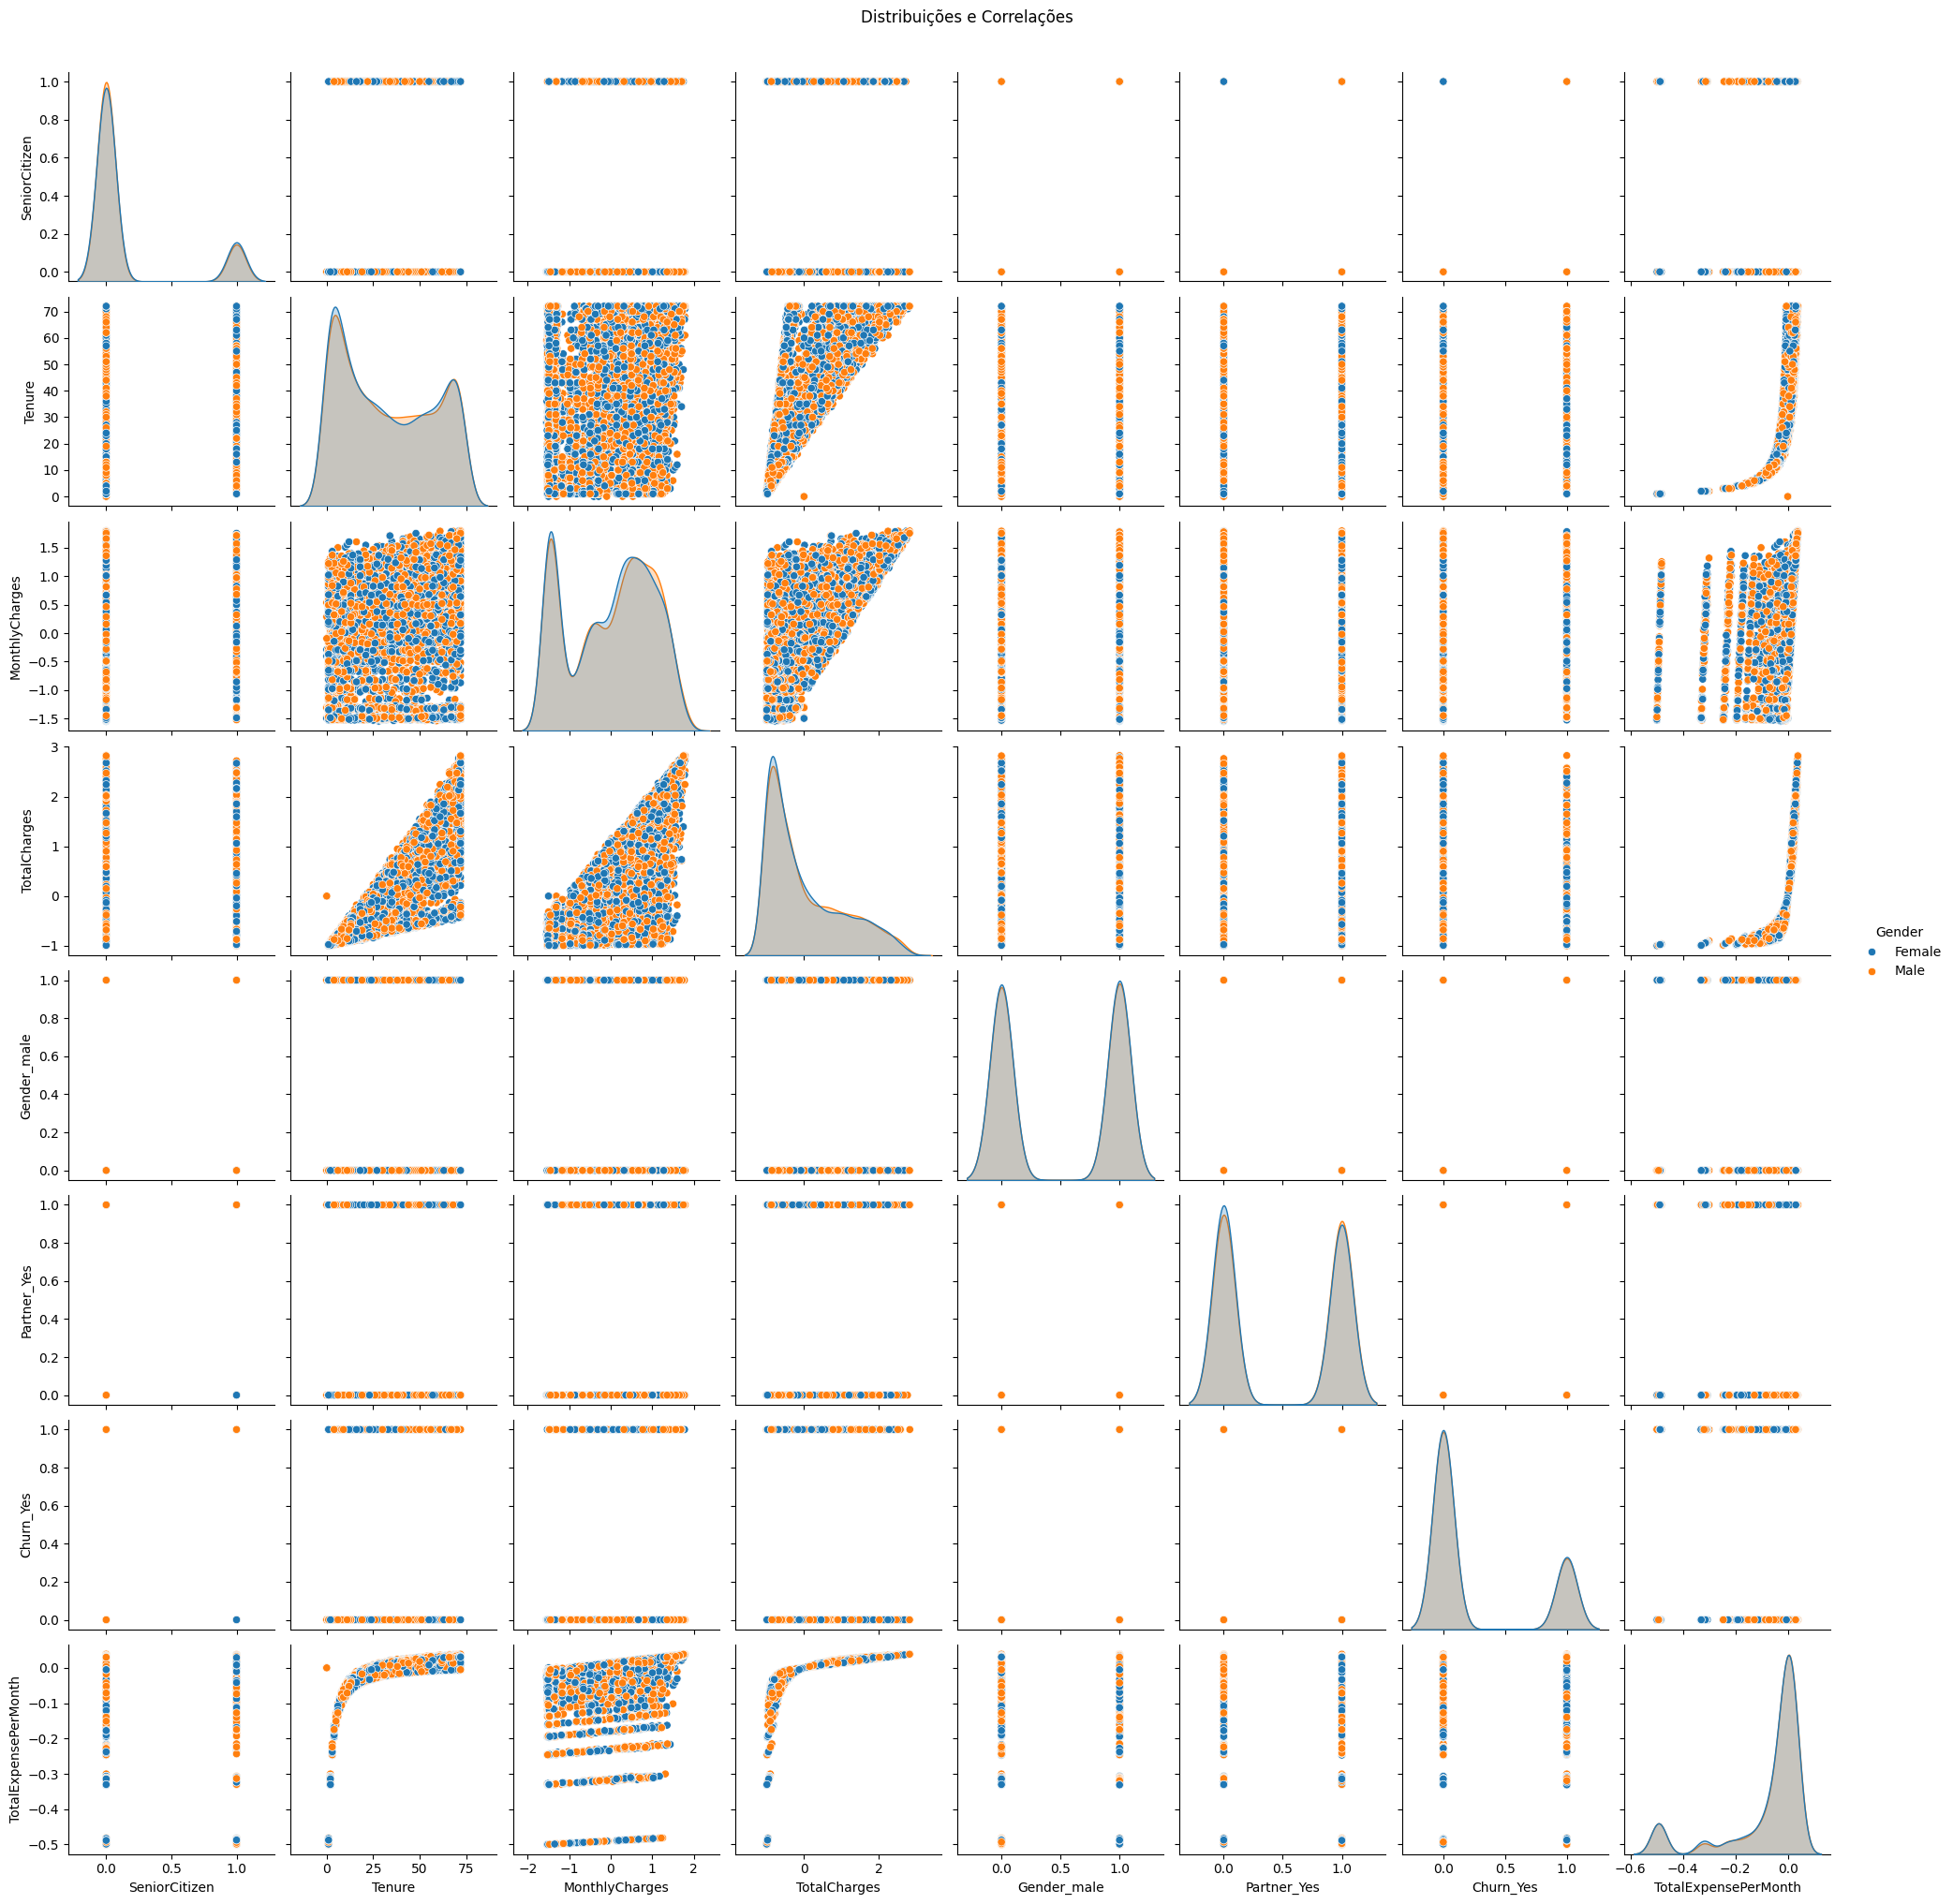

In [ ]:
# Passo 5.2: Visualização das Distribuições e Correlações
sns.pairplot(df, hue='Gender')
plt.suptitle('Distribuições e Correlações', y=1.02)
plt.show()

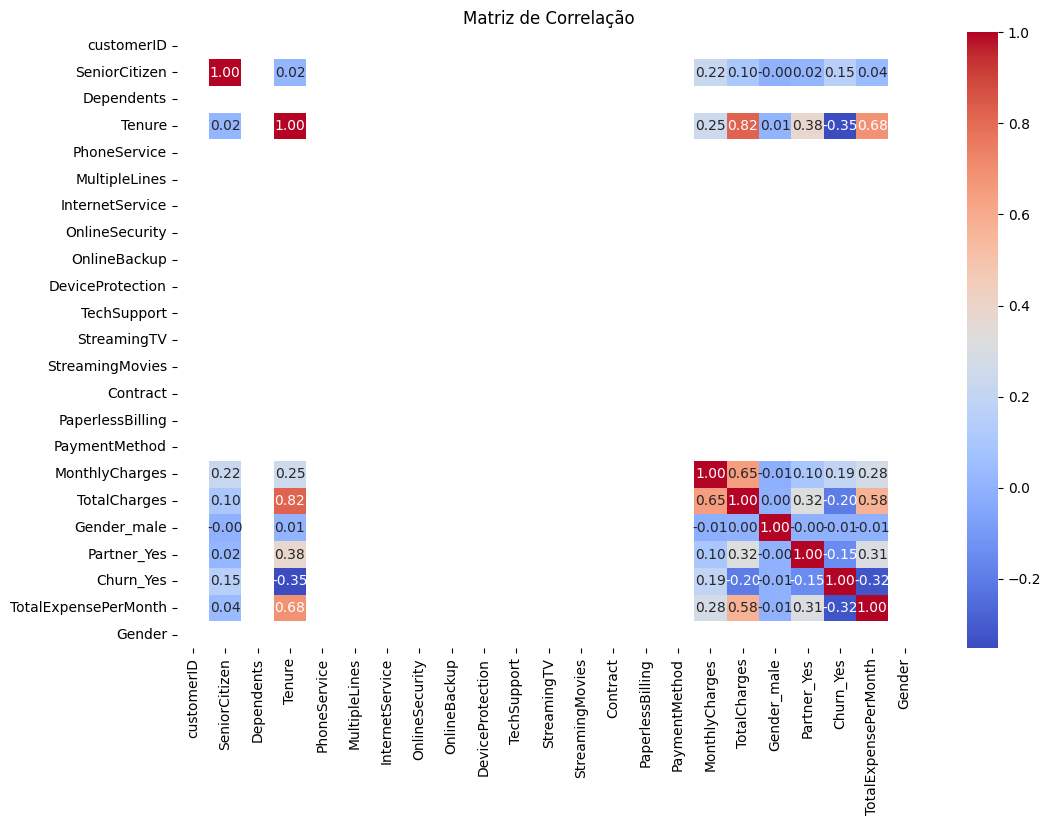

In [ ]:
# Tentar converter todas as colunas para numérico, onde possível
df = df.apply(pd.to_numeric, errors='coerce')
# Selecionar apenas colunas numéricas para a matriz de correlação

numerical_df = df.select_dtypes(include=[np.number])

# Gerar Matriz de correlação e o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Relatório Final do Trabalho**

Para elaborar uma análise minuciosa, faz-se necessário focar em cada etapa definida no código para explorar e atender o conjunto de dados.

Ao final deste relatório é apresentado uma Situação problema com análise dos gráficos implementados.

A base de dados utilizada para esta análise foi a de uma simulação de uma operadora telefônica que apresentou um índice de cancelamentos de assinaturas. Esta base de dados foi extraido do site Kaggle, devido os dados serem públicos.

Eis o resumo detalhado que cada seção do código e em seguida a interpretação.

**1 Exploração dos Dados**

**As primeiras linhas e Estruturas do Conjunto de Dados:** Ao exibir as primeiras e últimas linhas do conjunto, é possível
observar a estrutura dos dados e verificar se as colunas contém os tipos de dados esperados.

**Descrição das Variáveis:** O comando "df.describe(include='all')" permite ver as principais estatísticas das variáveis ,
como média, desvio padrão e contagens para variáveis categóricas.

**Análise:**

**Tipos de Variáveis:** Identificar quais colunas são numéricas "(como ValorMensal e TotalGasto)" e quais são categóricas "(como
Genero, Dependente, Churn)".

**Estatísticas:** As variáveis numéricas devem mostrar medidas como média e dispersão, o que indica como dos dados estão distribuídos.
Para variáveis categóricas, é útil observar as frequências.

**2 Limpeza de Dados**

**Tratamento de Valores Ausentes:** Verica quais as colunas têm valores ausentes e os substitui conforme o tipo de variável. Por exemplo, para "TotalGasto", um valor numérico, é usada a média, enquanto para as variáveis categóricas, a  moda é a mais indicada.

**Remoção de Colunas Vazias:** A coluna "Codigo" foi removida por estar vazia ou irrelevante para a análise. Neste quesito,
as colunas "Unnamed: 0" e "IDCliente" também foram eliminadas, visto que não trariam relevância para a análise.

**Correção de Erros e inconsistências:** Normalizando a capitalização em "Genero" para evitar variações inconsistentes.

**Remoção de Duplicatas:** As duplicatas são eliminadas para assegurar que cada entrada seja única.

**Análise:**

**Impacto dos Valores Ausentes:** Com a imputação, verificou se a estrutura dos dados permanece coerente. A média em variáveis
numéricas minimiza o impacto da ausência, enquanto a moda em categórias garante que elas não sejam enviesadas.

**Inconsistências Categóricas:** Ao uniformizar as categorias, minimizamos possíveis erros de leitura ou processamento futuro.

**3 Detecção e Tratamento de Outliers**

**Identificação de Outliers:** A análise utiliza boxplots para visualizar dados extremos em colunas como "ValorMensal".

**Tratamento de Outliers:** Aplicação do método IQR para limitar os valores aos intervalos interquartis. Isso ajuda a suavizar
a distribuição, garantindo que os outliers não distorçam as análises.

**Análise:**

**Visualização de Boxplot:** Facilita identificar quais variáveis têm valores atípicos significativos.

**Tratamento de Outliers:** Remover ou ajustar outliers ajuda a obter uma visão mais realista, especialmente para análises que dependem
de médias.

Reprodução: **Comentários do Boxplot MonthlyCharges sugere:**

**1 Distribuição Geral:**

Faixa de valores mensais entre aproximadamente 20 e 120.

O boxplot é bastante simétrico, indicando que os valores não possuem uma tendência acentuada de assimétria.  

**Quartis:**

A linha central representa a mediana, que parece estar próxima de 70, indicando que metade dos clientes paga abaixo desse valor e metade paga acima.

A parte inferior e superior do retângulo representam o primeiro e o terceiro quartil, respectivamente, mostrando que 50% dos valores estão concentrados aproximadamente entre 40 e 90.

**3 Amplitude e Disperção:**

A distância entre os quartis indica que há uma grande variação nos valores cobrados mensalmente.

Nâo há outliers visíveis (não se encontra ponto fora do intervalo dos limites do boxplot), o que um indicador de que a maioria dos clientes paga da faixa esperada sem valores muito distantes.

Síntese:

 A ampla faixa de valores pode refletir a presença de diferentes planos ou pacotes oferecidos, com alguns mais acessíveis e outros premium. E como a mediana está próxima do terceiro quartil, isso pode ser um indicador de que uma proporção significativa de clientes paga um valor mais alto, enquanto há uma menor quantidade pagando valores abaixo de 70.          

**4 Codificação e Padronização**

**Codificação de Varias Categórias:** A conversão das colunas categóricas "(Genero, Casado, Churn)" para variáveis numéricas
(usando One-Hot Encoding) permite aplicá-las em modelos de aprendizado de máquina e facilita o cálculo de correlações.

**Padronização ou Normalização:** A normalização das colunas "ValorMensal" e "TotalGasto" paera uma escala padrão permite compará-las
diretamente, sem viés de magnitude.

**Análise:**

**Interpretação das Variáveis Codificadas:** As colunas geradas pela codificação binária representam as categorias originais e
permitem uma análise mais robusta.

**Normalização:** Melhora a consistência da análise quantitativa ao reduzir a influência de escalas variáveis.


**5 Feature Engineering e Visualização**

**Criação de Novas Variáveis:** O cálculo de "GastoTotalPorMes" oferece ideias (insights) sobre o comportamento dos clientes
ao longo do tempo, ajustado pelos meses de associação.

**Visualização das Distribuições e Correlações:**

**Paiplot:** A função "sns.pairplot" ajuda a entender a relação entre as variáveis
numéricas e identifica possíveis associações.

**Heatmap de Correlação:** A matriz de correlação visualizada por um heatmap
ajuda  ver quais variáveis têm fortes relações entre si. Isso é útil para detectar multicolinearidade, que pode distorcer
modelos preditivos.

**Análise:**

**Ideia (insight) das Novas Variáveis:** A variável "GastoTotalPorMes" pode revelar tendências de consumo e fidelidade.

**Distribuição e Correlação:** Com a matriz de correlação, podemos identificar padrões, como se há correlação entre "TotalGasto" e
"ValorMensal".

Em síntese, conclui-se que esta análise de dados auxiliará nos seguintes **objetivos:**

**Identificar** padrões e associações no comportamento dos clientes, como gasto médio, relação com churn, etc.

**Fornecer** uma base limpa e padronizada para análises avançadas ou modelos preditivos.

**Destacar** ideias (insights) para ações estratégicas, como fidelização de clientes com alto gasto mensal ou previsão de churn
para clintes em situações específicas.

**Situação Problema**

Não é suficiente saber utilizar as ferramentas tecnológicas para trabalhar com dados estatísticos.

É necessário entender o problema que se quer resolver e então, a partir desta visão, implementar os meios necessários para solucioná-lo.

A base de dados tem um coluna "Churn" que mostra que muitos clientes estão cancelando as assinaturas dos serviços de uma operadora de telefonia. Diante deste cenário, questões são levantadas e requerem medias para mitigar esta saída de clientes e trazê-los de volta.

**Questões:**

**Qual é o problema?**

Alto índice de cancelamento de contratos.

**O que fazer diante do problema?**

Entender os principais motivos que levam ao cancelamento para então implementar
um plano de ação.

In [20]:
planilha = "https://raw.githubusercontent.com/alvesdealmeida/dataset/refs/heads/main/TelecomCustomerChurn.csv"
telefonia = pd.read_csv(planilha)
telefonia

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [21]:
# Tratando os dados
print(telefonia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# A coluna TotalCharges está classificada como Object, mas se trata de números e deve ser tratada como tal
telefonia["TotralCharges"] = pd.to_numeric(telefonia["TotalCharges"], errors="coerce")

In [ ]:
# Removendo a coluna que esteja toda vazia
telefonia = telefonia.dropna(how="all", axis=1)

In [ ]:
# Removendo a linha vazia, caso tenha
telefonia = telefonia.dropna()

In [ ]:
print(telefonia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Analise de Dados:**

**Problema:**

Alto índice de cancelamento de contratos.

**O que fazer?**

Entender e compreender os motivos principais que
levaram o cliente a cancelar as assinaturas e implementar
um plano de ação.

In [ ]:
# Analise exploratória para ver o grau/tamanho de cancelamentos de assinaturas
display(telefonia["Churn"].value_counts())
display(telefonia["Churn"].value_counts(normalize=True))

,count
Churn,
No,5163
Yes,1869


,proportion
Churn,
No,0.734215
Yes,0.265785


In [ ]:
# Melhorando a visualziação dos valores passando para porcetagem para ser entendido ao bater o olho
display(telefonia["Churn"].value_counts())
display(telefonia["Churn"].value_counts(normalize=True).map('{:.1%}'.format))

,count
Churn,
No,5163
Yes,1869


,proportion
Churn,
No,73.4%
Yes,26.6%


**Churn** é uma métrica utilizada para mostrar a quantidade de clientes que cancelaram um determinado serviço em um determinado período de tempo.
No caso da telefônica o **índice de cancelamento**, após os devidos ajustes na
base de dados, é de **26.6%** .

In [ ]:
# Analisando Dados por meio dos Gráficos
import plotly.express as px

In [ ]:
# Há muitas colunas e para criação de vários gráficos- uso do laço de repetição for
for coluna in telefonia:
    if coluna != "customerID":
       fig = px.histogram(telefonia, x=coluna, color="Churn")
       fig.show()
       display(telefonia.pivot_table(index="Churn", columns=coluna, aggfunc="count")["customerID"])

Gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


SeniorCitizen,0,1
Churn,,
No,4497,666
Yes,1393,476


Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


Tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Yes,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


PhoneService,No,Yes
Churn,,
No,510,4653
Yes,170,1699


MultipleLines,No,Yes
Churn,,
No,3046,2117
Yes,1019,850


InternetService,DSL,Fiber optic,No
Churn,,,
No,1957,1799,1407
Yes,459,1297,113


OnlineSecurity,No,Yes
Churn,,
No,3443,1720
Yes,1574,295


OnlineBackup,No,Yes
Churn,,
No,3261,1902
Yes,1346,523


DeviceProtection,No,Yes
Churn,,
No,3290,1873
Yes,1324,545


TechSupport,No,Yes
Churn,,
No,3433,1730
Yes,1559,310


StreamingTV,No,Yes
Churn,,
No,3274,1889
Yes,1055,814


StreamingMovies,No,Yes
Churn,,
No,3250,1913
Yes,1051,818


Contract,Monthly,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


PaperlessBilling,No,Yes
Churn,,
No,2395,2768
Yes,469,1400


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Manual
Churn,,,
No,1284,1289,2590
Yes,258,232,1379


MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
Churn,,,,,,,,,,,,,,,,,,,,,
No,1.0,1.0,1.0,2.0,1.0,7.0,4.0,2.0,5.0,6.0,...,1.0,NaN,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.0
Yes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


TotalCharges,100.2,100.25,100.35,100.4,100.8,100.9,1001.2,1001.5,1003.05,1004.35,...,995.35,996.45,996.85,996.95,997.65,997.75,998.1,999.45,999.8,999.9
Churn,,,,,,,,,,,,,,,,,,,,,
No,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0
Yes,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN


Churn,No,Yes
Churn,,
No,5163.0,NaN
Yes,NaN,1869.0


TotralCharges,18.80,18.85,18.90,19.00,19.05,19.10,19.15,19.20,19.25,19.30,...,8477.70,8496.70,8529.50,8543.25,8547.15,8564.75,8594.40,8670.10,8672.45,8684.80
Churn,,,,,,,,,,,,,,,,,,,,,
No,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Yes,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**Análise de Dados Gráfico Contrato:**

**Problema:**

Contrato Mensal com alta taxa de cancelamento superior aos demais tipos de pagamentos.

**Ação:**

Melhorar as condições comerciais dos planos anuais com o objetivo de atrair o cliente para
essa modalidade.

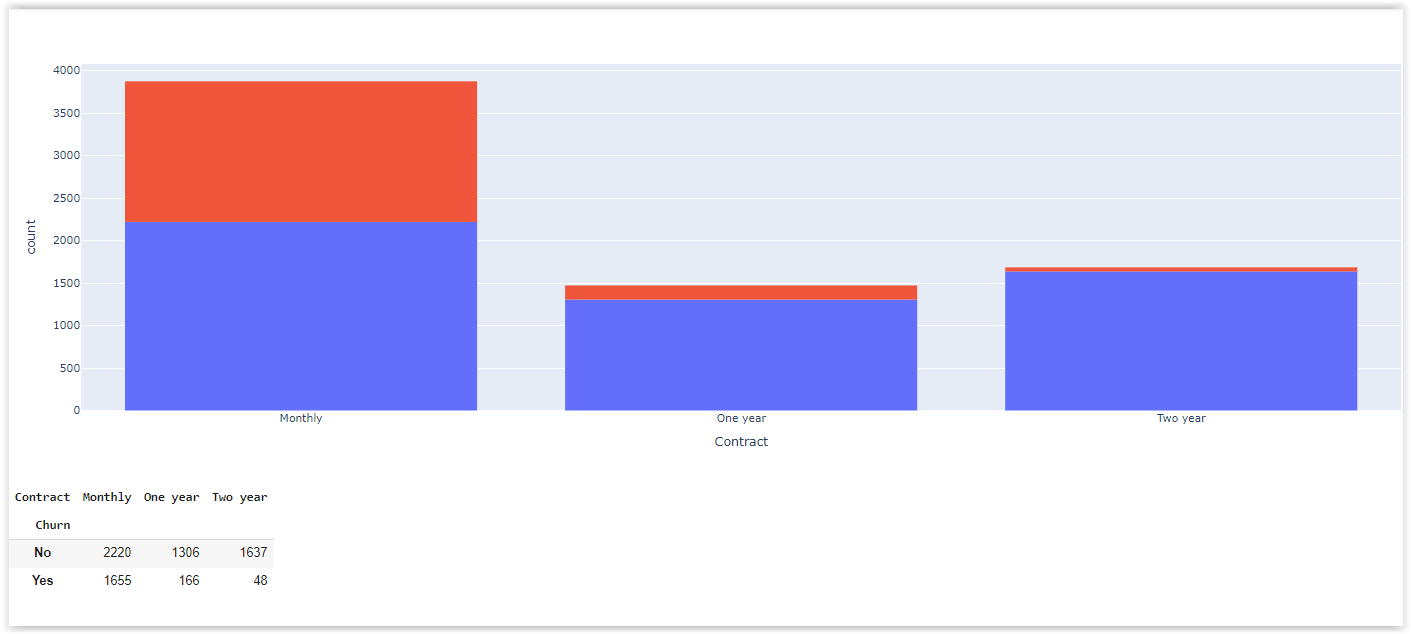


**Análise do Grafico Método de Pagamento**

**Problema:**

Nível de cancelamento, devido ao  pagamento manual, é elevado em relação aos outros métodos.

**Possíveis Razões:**

Esquecimento ou dificuldade em efetuar o pagamento.

Inconveniência do processo manual.

Falta de acompanhamento.

**Ações:**

Incentivar a adoção de pagamentos automáticos: oferecer incentivos, como descontos ou pontos de fidelidade para os clientes
optarem mudar de método de pagamento (para o automático).

Implementar lembretes de pagamento e notificações: Enviar lembretes automáticos por e-mail, sms ou notificações pelo aplicativo para os clientes.

Facilitar a migração para pagamento automático: Tornar o processo de alteração do método de pagamento simples e acessível para que os clientes possam
migrar para os outros métodos automáticos.

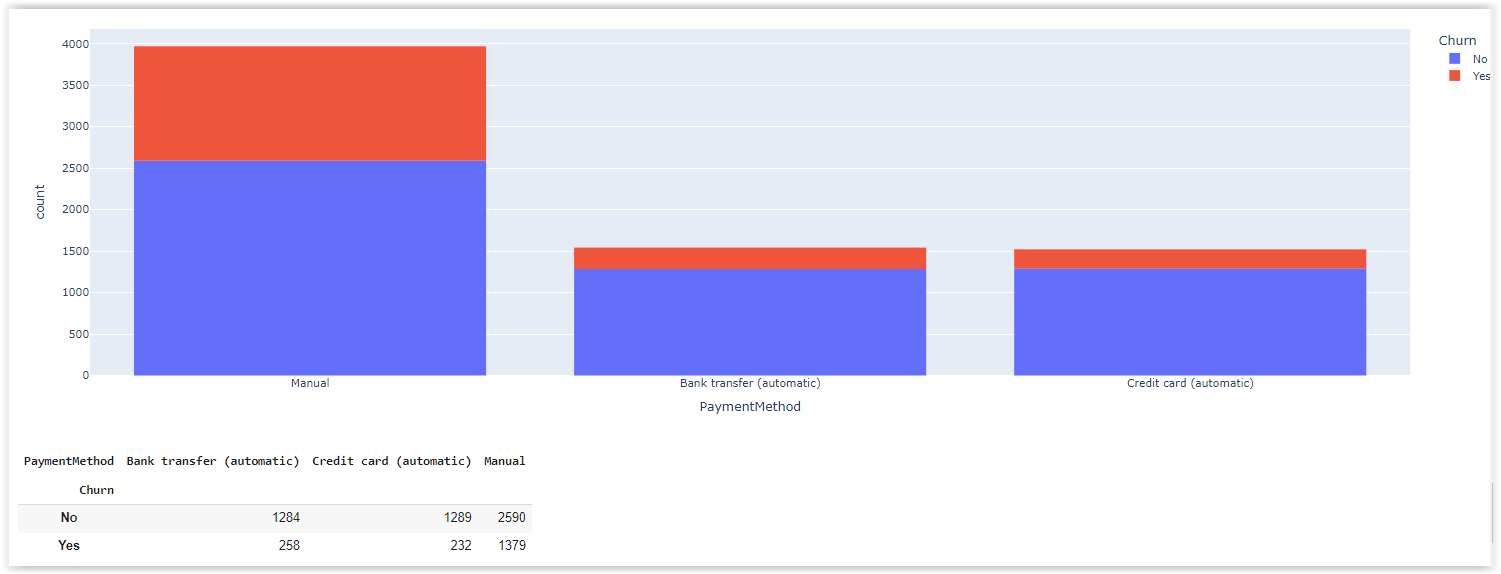

**Fonte da Base de Dados:**

**Kaggle**

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers